# **1. Import Library**

In [1]:
import pandas as pd
from sklearn import datasets

# **2. Read Dataset**

In [2]:
# Memuat dataset IRIS dari scikit-learn
gilang_tes = datasets.load_iris()

X = gilang_tes.data    # inputan untuk machine learning
y = gilang_tes.target  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=gilang_tes.feature_names)
df_y = pd.Series(y, name='target')

In [3]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df['target'].unique()

array([0, 1, 2])

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **3. Split Data**

In [9]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

# **4. Train the Model**

**- Menggunakan 4 Model Machine Learning Logistic Regression, Decision Tree, Random Forest Dan Naive Bayes**

In [10]:
# Inisialisasi model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mpl_toolkits.mplot3d

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=200)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100)

# **5. VISUALISASI**

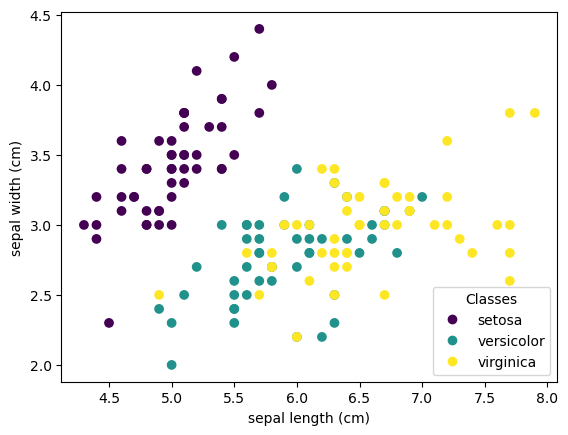

In [11]:
gilang_tes = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(gilang_tes.data[:, 0], gilang_tes.data[:, 1], c=gilang_tes.target)
ax.set(xlabel=gilang_tes.feature_names[0], ylabel=gilang_tes.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], gilang_tes.target_names, loc="lower right", title="Classes"
)

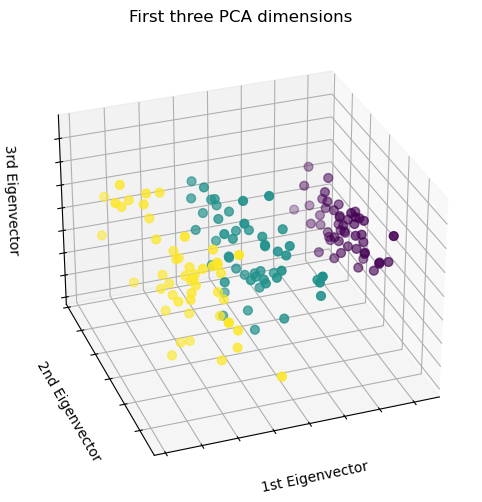

In [12]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(gilang_tes.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=gilang_tes.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

Explained variance ratio (first two components): [0.92461872 0.05306648]


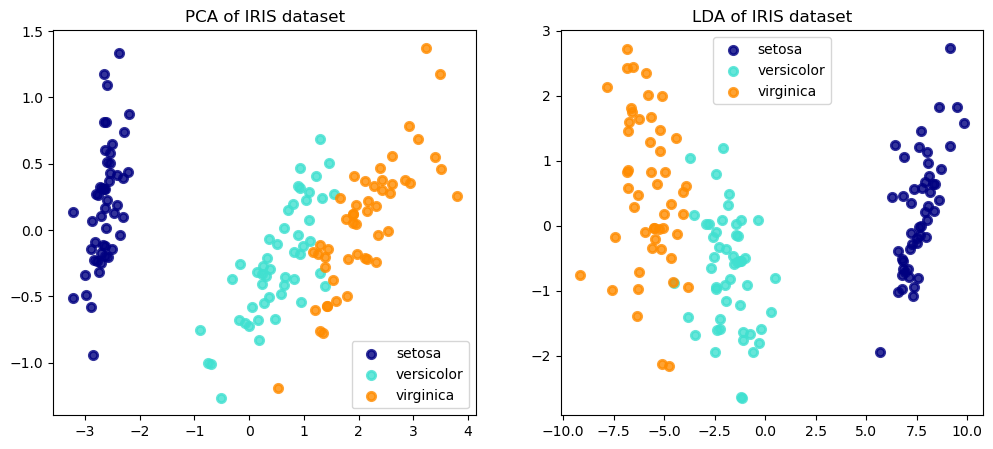

In [13]:
X = gilang_tes.data
y = gilang_tes.target
target_names = gilang_tes.target_names

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

# Explained variance ratio
print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot PCA result on the left
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[0].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
axes[0].legend(loc="best", shadow=False, scatterpoints=1)
axes[0].set_title("PCA of IRIS dataset")

# Plot LDA result on the right
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[1].scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
axes[1].legend(loc="best", shadow=False, scatterpoints=1)
axes[1].set_title("LDA of IRIS dataset")

plt.show()

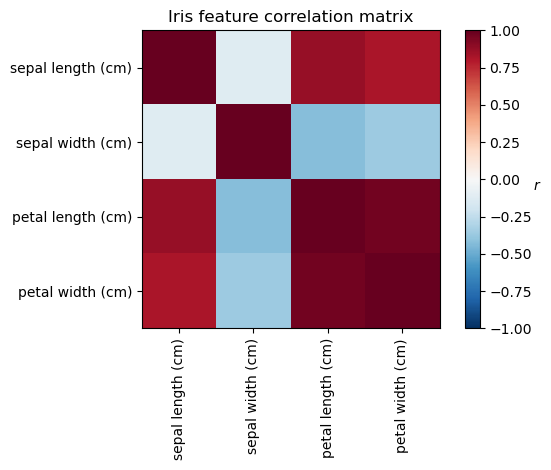

In [14]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(gilang_tes.feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(gilang_tes.feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()



 PCA :

[[ 0.36138659  0.65658877]
 [-0.08452251  0.73016143]
 [ 0.85667061 -0.17337266]
 [ 0.3582892  -0.07548102]]


 Unrotated FA :

[[ 0.72746132 -0.36874572]
 [-0.18085204 -0.24059   ]
 [ 1.75790224  0.03551754]
 [ 0.73100458  0.04526567]]


 Varimax FA :

[[ 0.71195127 -0.39786777]
 [-0.19043525 -0.23307815]
 [ 1.75790029 -0.03561382]
 [ 0.73223725  0.01566151]]


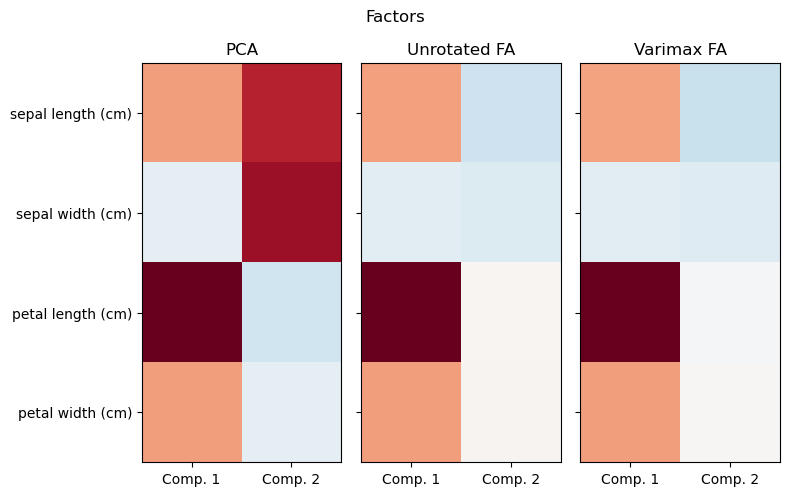

In [15]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(8, 5), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    # The user was trying to call a method 'arange' on the Bunch object, but should be using np.arange instead.
    ax.set_yticks(np.arange(len(gilang_tes.feature_names)))
    ax.set_yticklabels(gilang_tes.feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

#**6. Predict & Evaluate**

- Membuat Model Naive Bayes

In [16]:
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [17]:
print("\nModel: Naive Bayes")
print(f"Akurasi: {accuracy_nb * 100:.2f}%")


Model: Naive Bayes
Akurasi: 96.67%


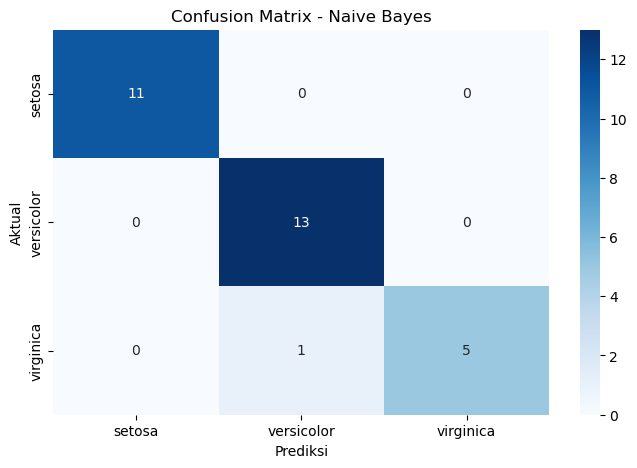

In [18]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=gilang_tes.target_names, yticklabels=gilang_tes.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [19]:
print("Laporan Klasifikasi: Naive Bayes")
print(classification_report(y_test, y_pred_nb, target_names=gilang_tes.target_names))

Laporan Klasifikasi: Naive Bayes
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



- Membuat Model Logistic Regression

In [20]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [21]:
print("\nModel: Logistic Regression")
print(f"Akurasi: {accuracy_lr * 100:.2f}%")


Model: Logistic Regression
Akurasi: 100.00%


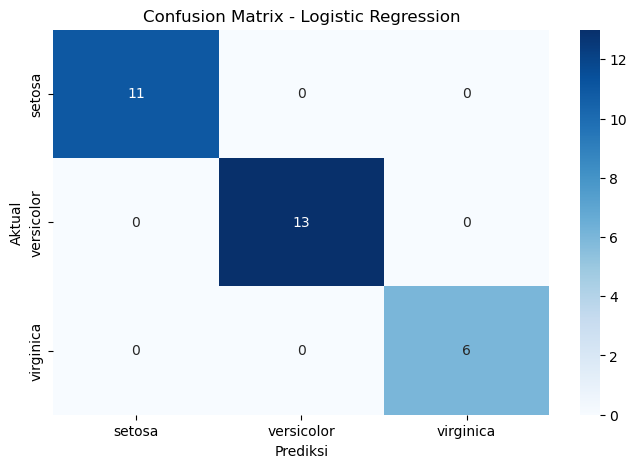

In [22]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=gilang_tes.target_names, yticklabels=gilang_tes.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [23]:
print("Laporan Klasifikasi: Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=gilang_tes.target_names))

Laporan Klasifikasi: Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- Membuat Model Random Forest

In [24]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [25]:
print("\nModel: Random Forest")
print(f"Akurasi: {accuracy_rf * 100:.2f}%")


Model: Random Forest
Akurasi: 96.67%


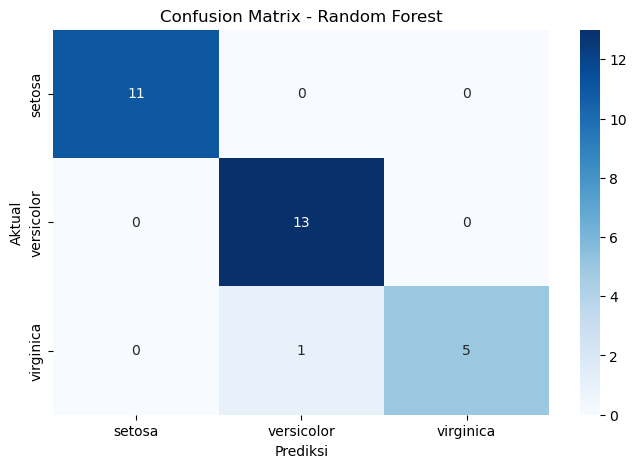

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=gilang_tes.target_names, yticklabels=gilang_tes.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [27]:
print("Laporan Klasifikasi: Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=gilang_tes.target_names))

Laporan Klasifikasi: Random Forest
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



- Membuat Model DecisionTreeClassifier

In [28]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [29]:
print("\nModel: DecisionTreeClassifier")
print(f"Akurasi: {accuracy_dt * 100:.2f}%")


Model: DecisionTreeClassifier
Akurasi: 100.00%


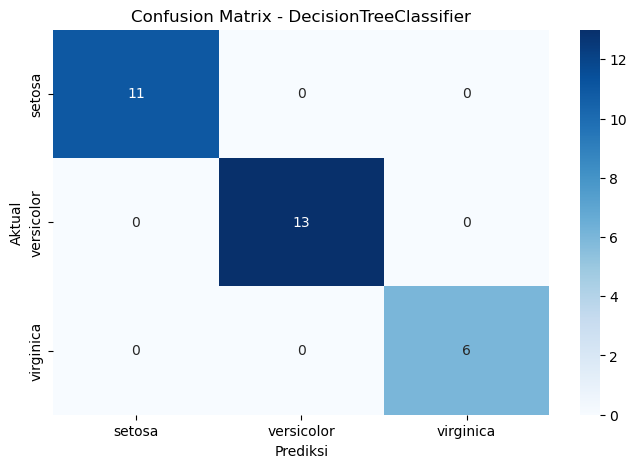

In [30]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=gilang_tes.target_names, yticklabels=gilang_tes.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - DecisionTreeClassifier")
plt.show()

In [31]:
print("Laporan Klasifikasi: DecisionTreeClassifier")
print(classification_report(y_test, y_pred_dt, target_names=gilang_tes.target_names))

Laporan Klasifikasi: DecisionTreeClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- Dari 4 Algoritmya yang digunakan Naive bayes mencapai acurrasy di 97%, Random Forest 97% sedangkan ke 2 algoritma lainnya mencapai 100%